# Wine Quality Prediction

The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [49]:
# Loading data set
url = "https://raw.githubusercontent.com/preethiakshai/OASIS/main/WineQT.csv"
try:
    wine_data = pd.read_csv(url, on_bad_lines='skip')
    print(wine_data.head())
except pd.errors.ParserError as e:
    print("Parser Error:", e)
except Exception as e:
    print("Error:", e)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

### Data Set Study

In [50]:
shape_=wine_data.shape
print("Number of rows =",shape_[0])
print("Number of columns = ", shape_[1])

Number of rows = 1143
Number of columns =  13


In [51]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

The dataset contains 1,143 entries and 13 columns, including the following relevant features for wine quality prediction:

Features: Chemical properties such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.

Target Variable: quality, which represents the wine quality score.

In [52]:
# datatypes 
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [53]:
# find null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There is no null values in the data set

In [54]:
# Drop the 'Id' column, as it's not needed for analysis
if 'Id' in wine_data.columns:
    wine_data = wine_data.drop(columns=['Id'])

In [55]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [56]:
# find duplicate values
wine_data.duplicated().sum()

125

There is no duplicate value in the data set

### Exploratory data Analysis

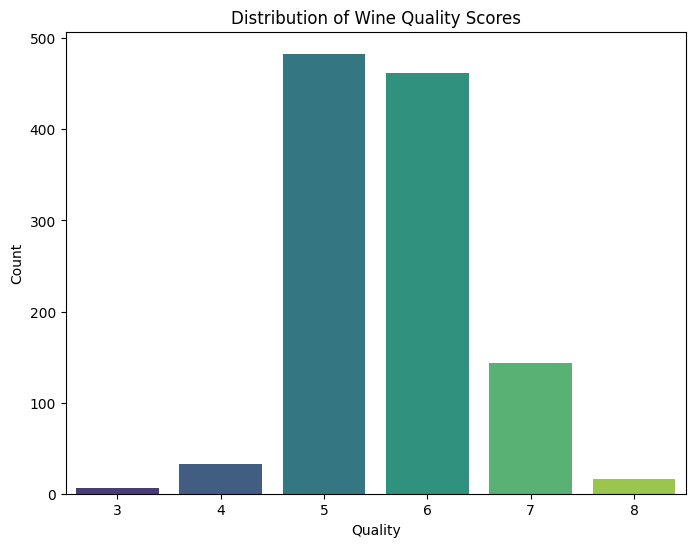

In [57]:
# Plot the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


In [58]:
wine_data.quality.value_counts().head()


quality
5    483
6    462
7    143
4     33
8     16
Name: count, dtype: int64

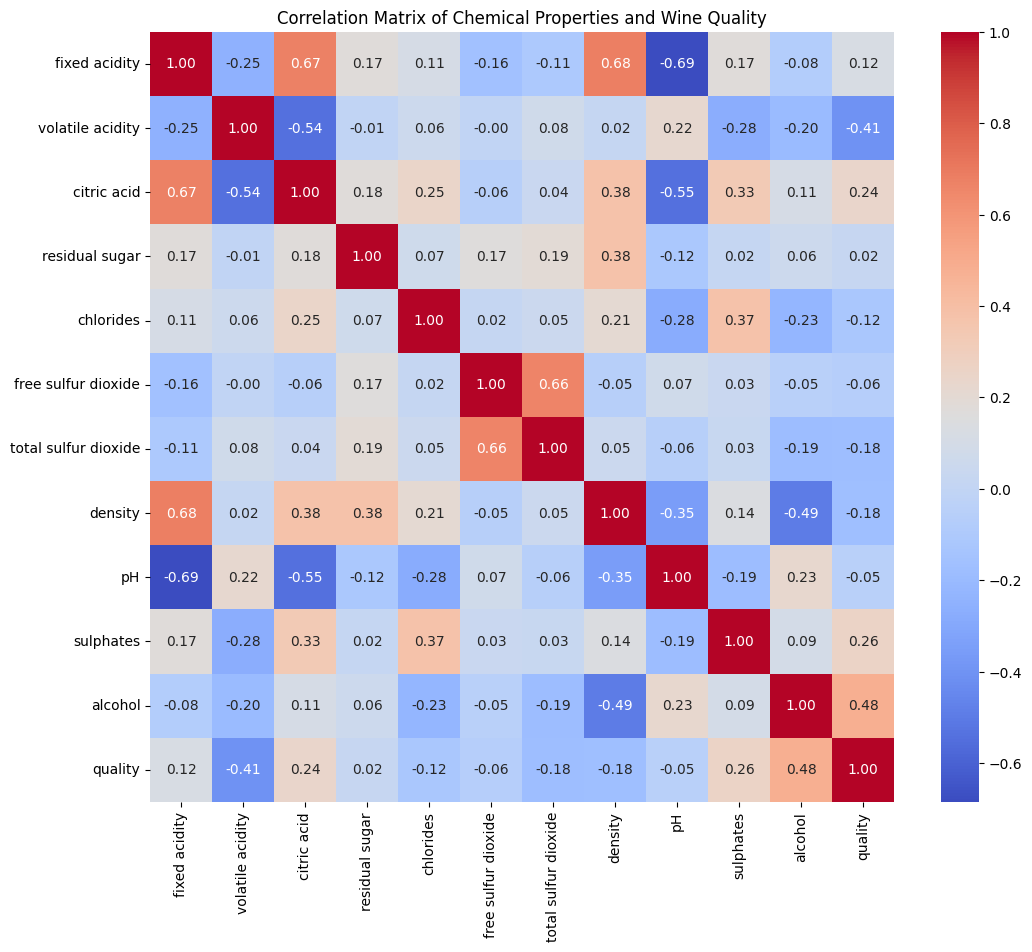

In [59]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Chemical Properties and Wine Quality")
plt.show()

The correlation matrix reveals some interesting patterns:


Density has a moderate positive correlation with fixed acidity.

Alcohol and sulphates show positive correlations with quality, indicating they might be significant predictors of higher wine quality.

Volatile acidity has a negative correlation with quality, suggesting that higher levels might reduce wine quality.

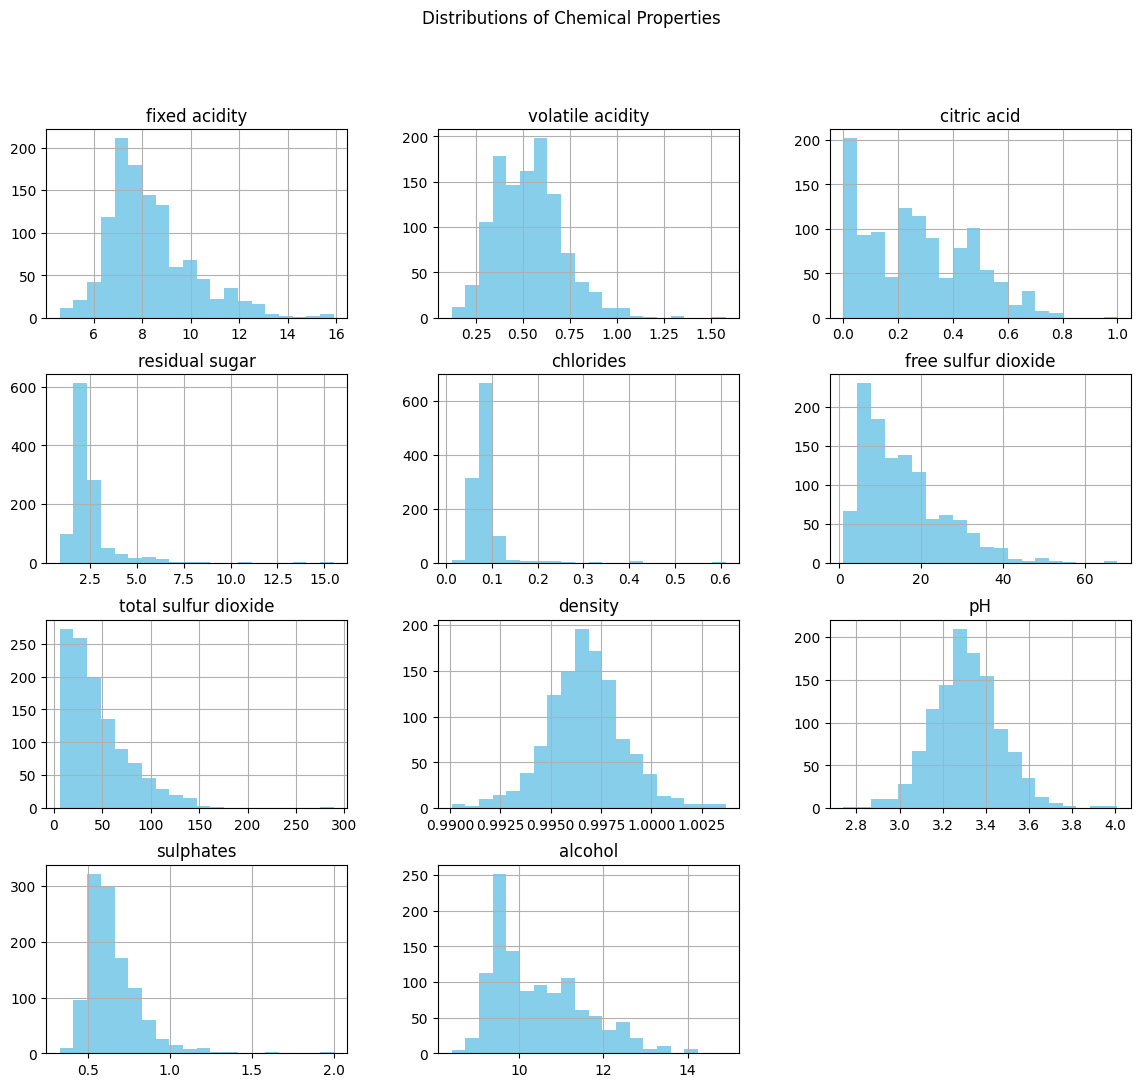

In [60]:
# Plot histograms for each chemical property to see their distributions
wine_data.drop(columns=['quality']).hist(bins=20, figsize=(14, 12), color='skyblue')
plt.suptitle("Distributions of Chemical Properties")
plt.show()

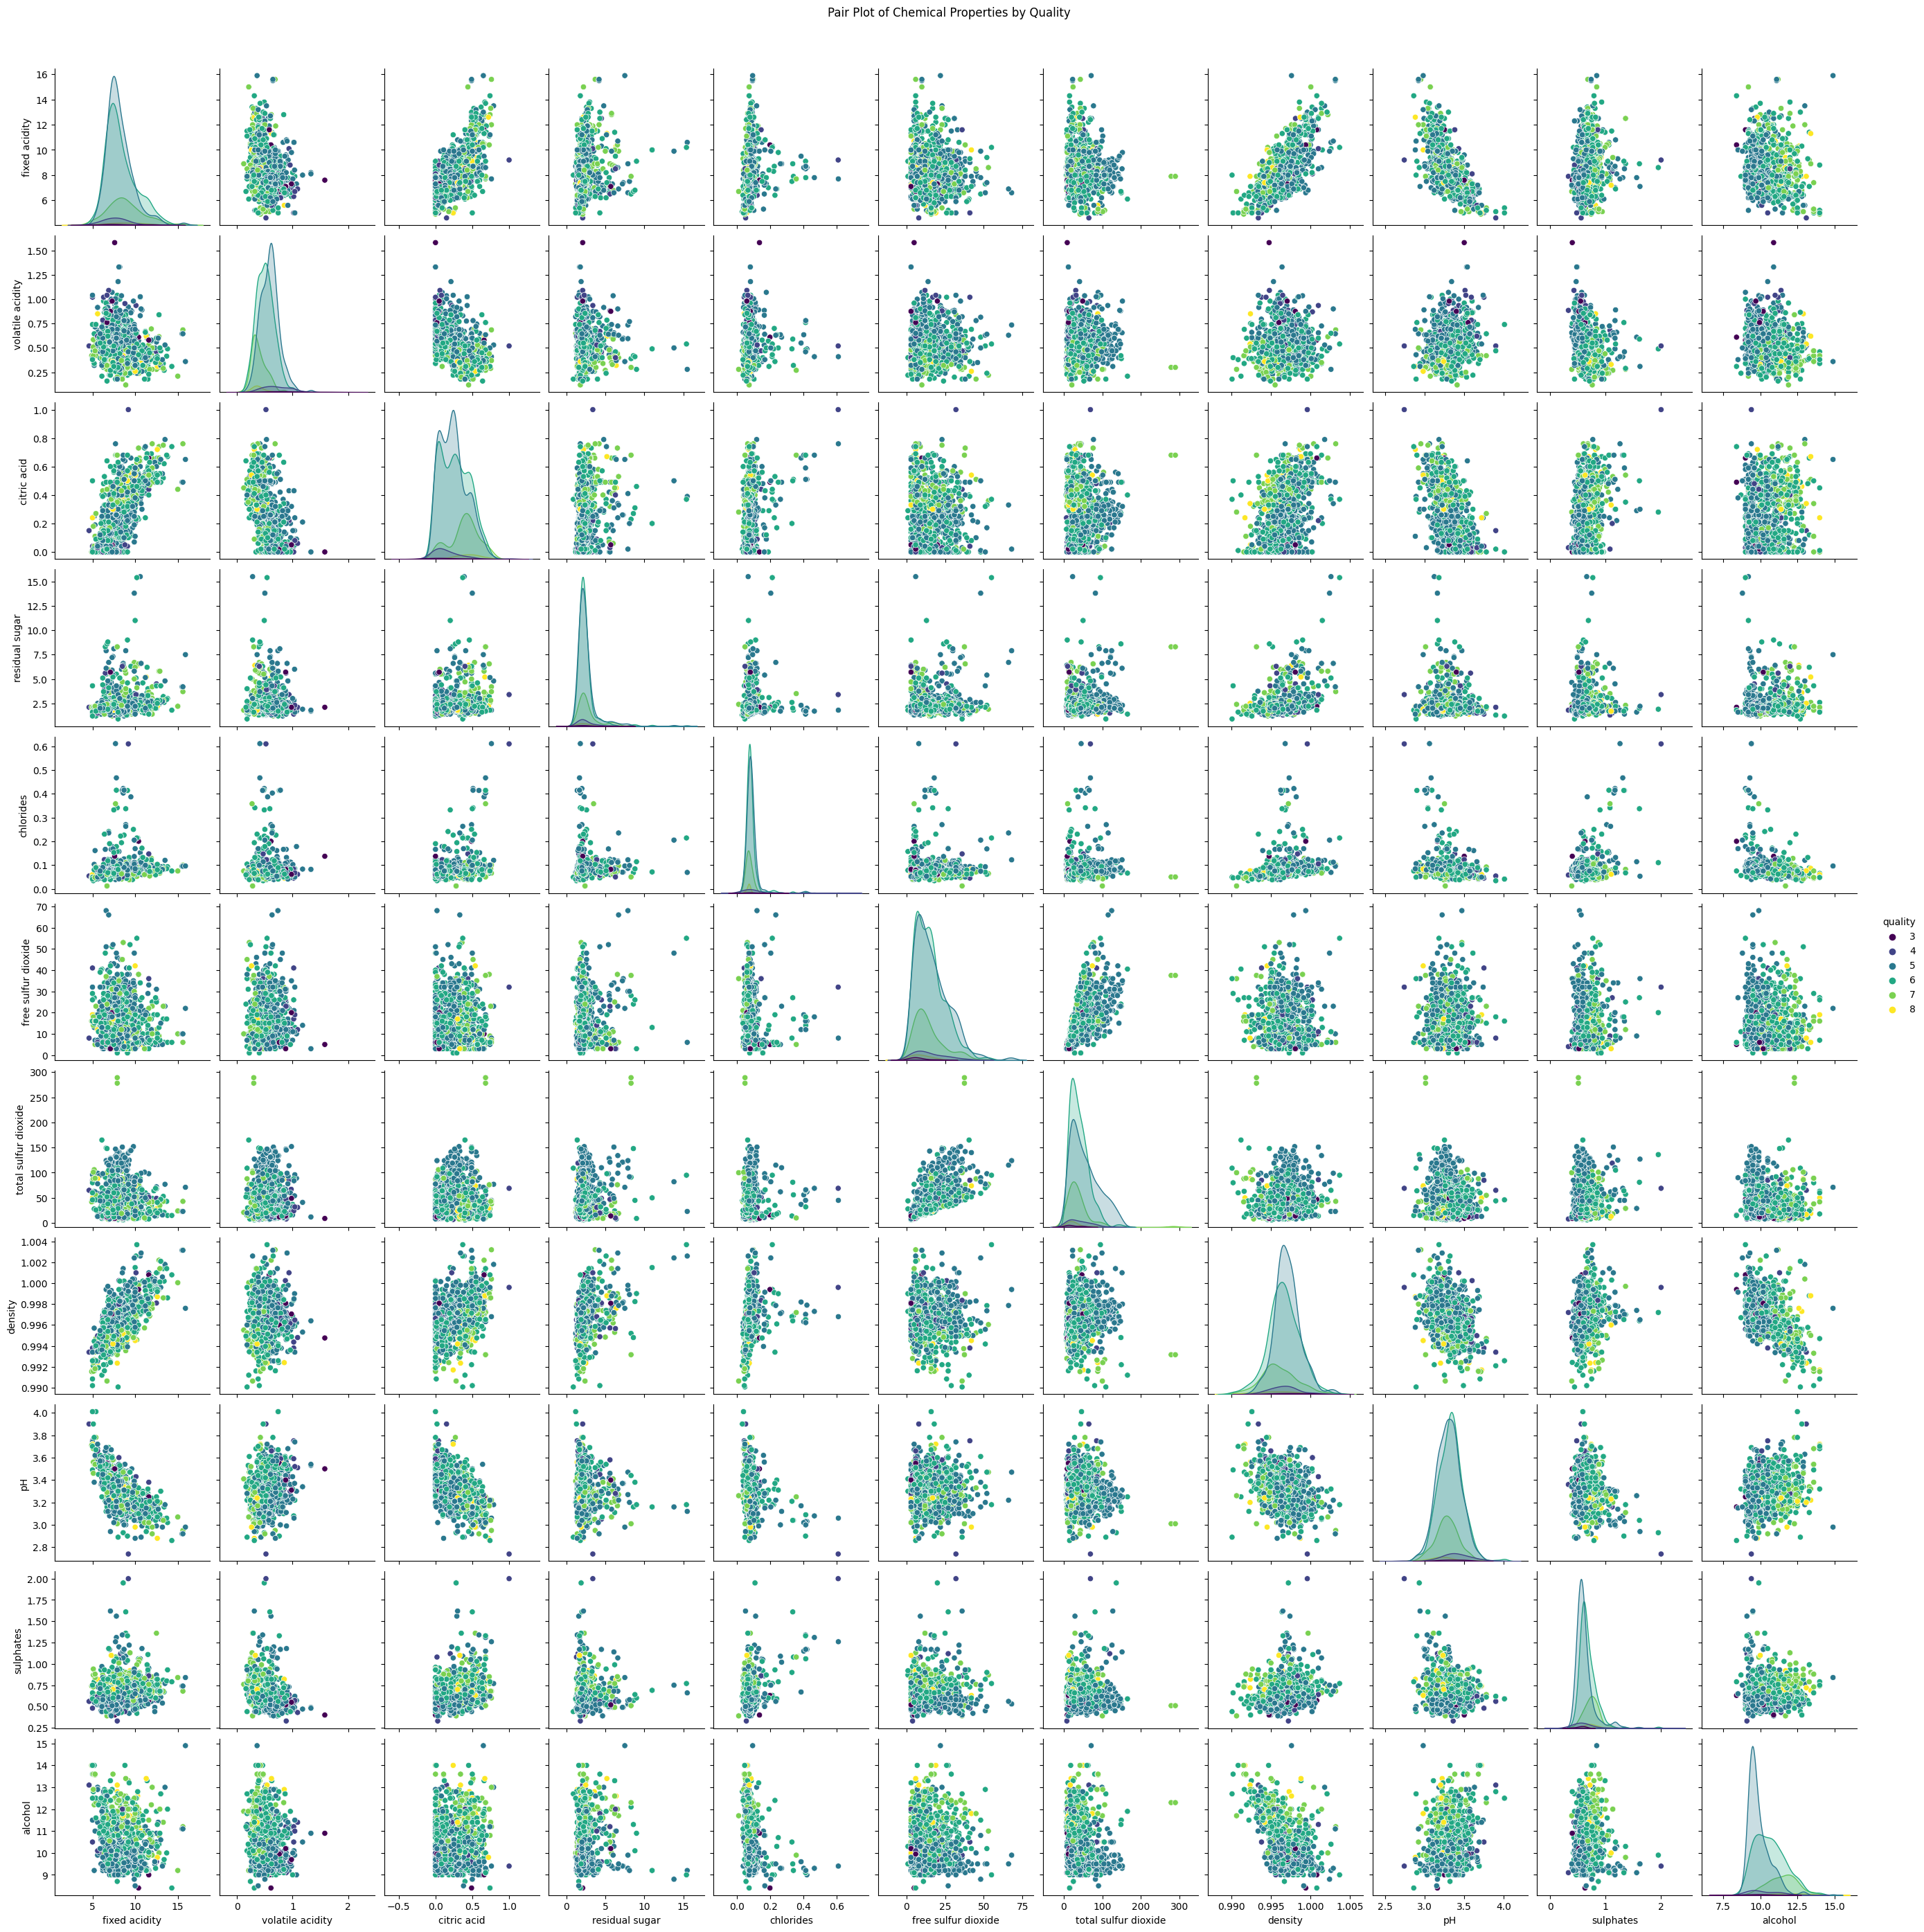

In [61]:
# Pair plot to visualize relationships between selected chemical properties and quality
sns.pairplot(wine_data, hue='quality', palette="viridis", diag_kind="kde")
plt.suptitle("Pair Plot of Chemical Properties by Quality", y=1.02)
plt.show()

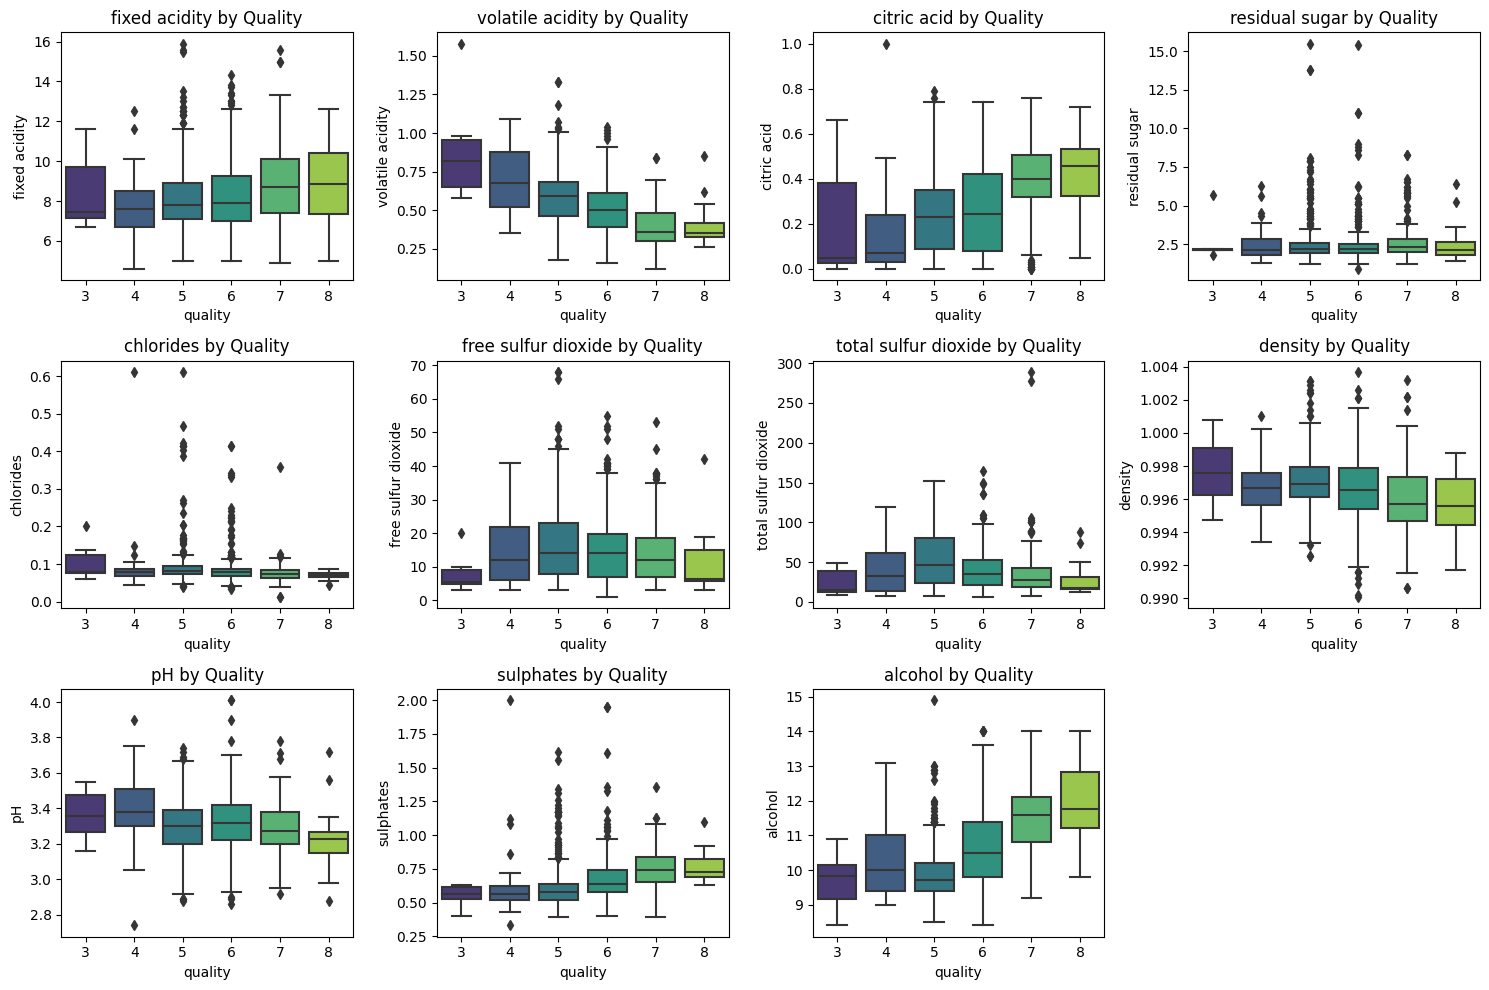

In [62]:
# Boxplot for each chemical property against wine quality to assess variability
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='quality', y=column, data=wine_data, palette="viridis")
    plt.title(f"{column} by Quality")
    plt.tight_layout()
plt.show()

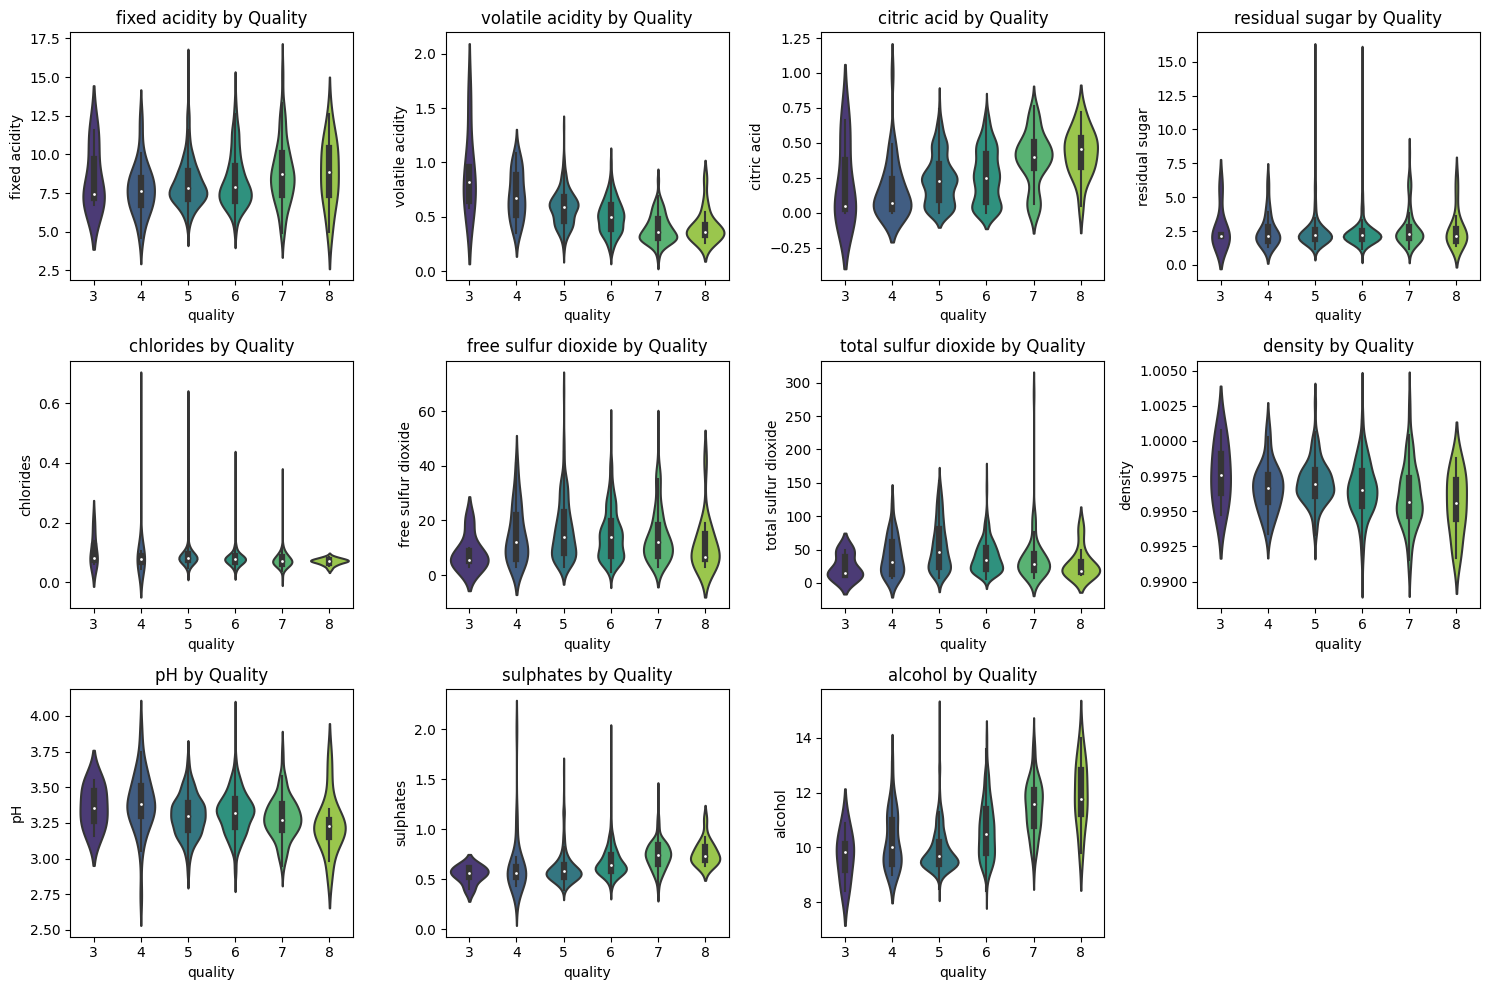

In [63]:
# Violin plots give insight into the distribution of each feature for different quality levels
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.violinplot(x='quality', y=column, data=wine_data, palette="viridis")
    plt.title(f"{column} by Quality")
    plt.tight_layout()
plt.show()

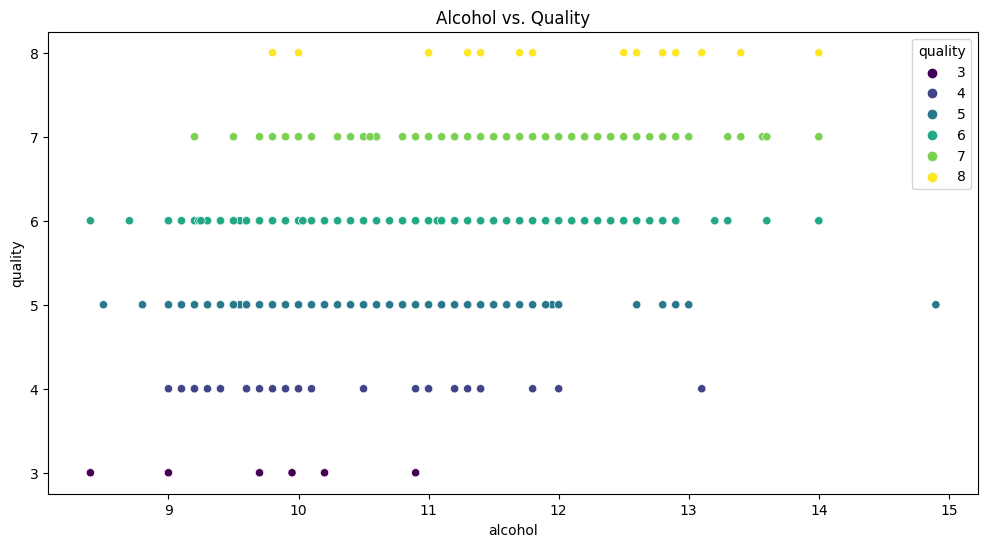

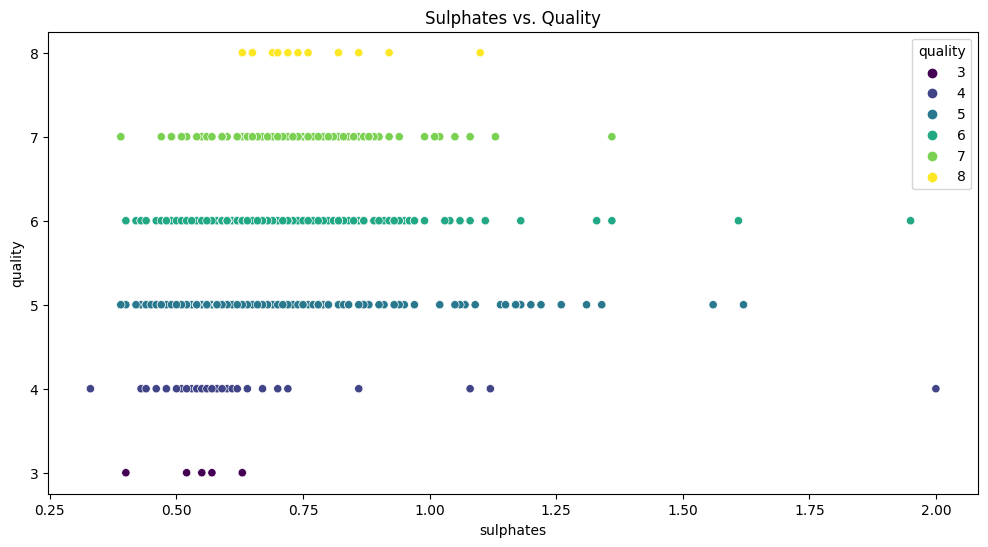

In [64]:
# Plot scatter plots for the most correlated features with quality (e.g., alcohol, sulphates)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='quality', data=wine_data, hue='quality', palette="viridis")
plt.title("Alcohol vs. Quality")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sulphates', y='quality', data=wine_data, hue='quality', palette="viridis")
plt.title("Sulphates vs. Quality")
plt.show()

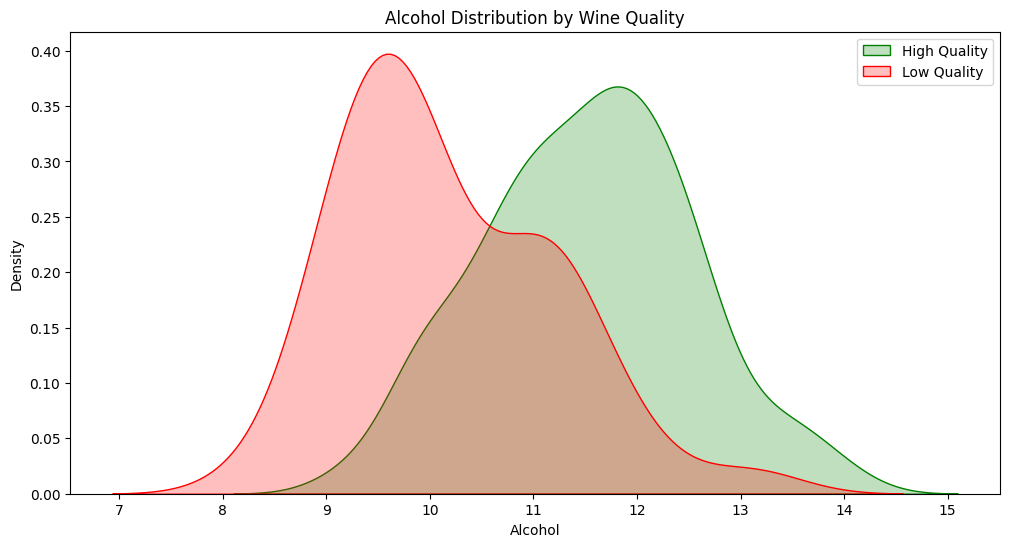

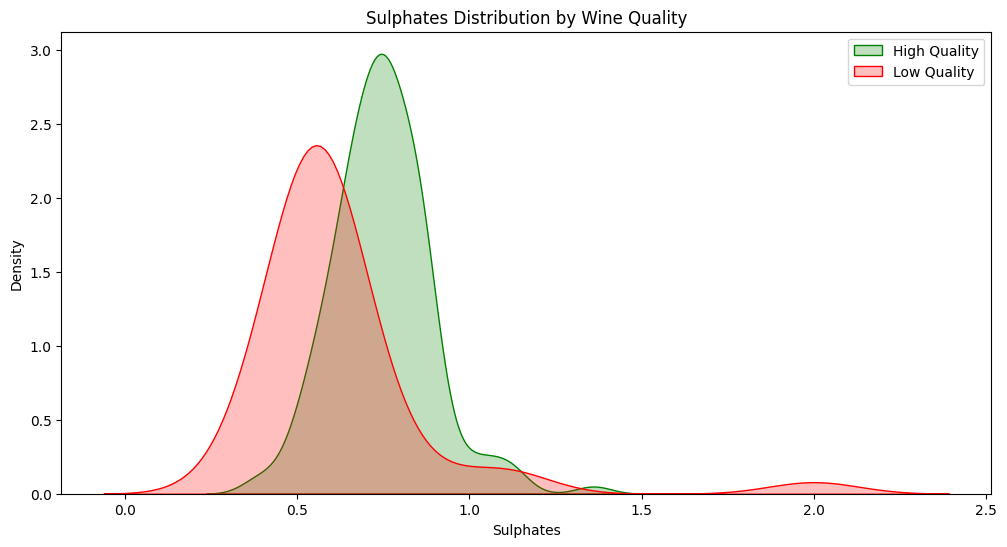

In [65]:
# Separate the data into high and low quality for further analysis
high_quality = wine_data[wine_data['quality'] >= 7]
low_quality = wine_data[wine_data['quality'] <= 4]

# Plot distributions of alcohol and sulphates for high and low quality wines
plt.figure(figsize=(12, 6))
sns.kdeplot(high_quality['alcohol'], label="High Quality", color="green", fill=True)
sns.kdeplot(low_quality['alcohol'], label="Low Quality", color="red", fill=True)
plt.title("Alcohol Distribution by Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(high_quality['sulphates'], label="High Quality", color="green", fill=True)
sns.kdeplot(low_quality['sulphates'], label="Low Quality", color="red", fill=True)
plt.title("Sulphates Distribution by Wine Quality")
plt.xlabel("Sulphates")
plt.ylabel("Density")
plt.legend()
plt.show()

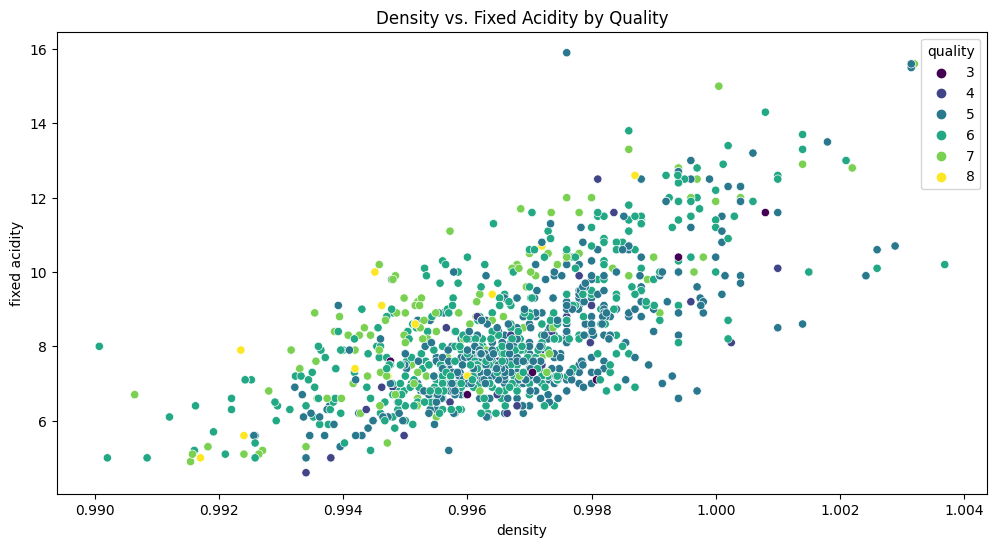

In [66]:
#Analyzing Density and Acidity in relation to Quality
plt.figure(figsize=(12, 6))
sns.scatterplot(x='density', y='fixed acidity', hue='quality', data=wine_data, palette="viridis")
plt.title("Density vs. Fixed Acidity by Quality")
plt.show()

### Data Splitting

In [67]:

X = wine_data.drop(columns=['quality'])  # Features
y = wine_data['quality']                 # Target variable


In [68]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [69]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [71]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###  Model Training and Evaluation


### Random Forest

In [73]:
# Train and evaluate Random Forest
# Initialize and Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

In [74]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7117903930131004
Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.86      0.79        97
           6       0.69      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229



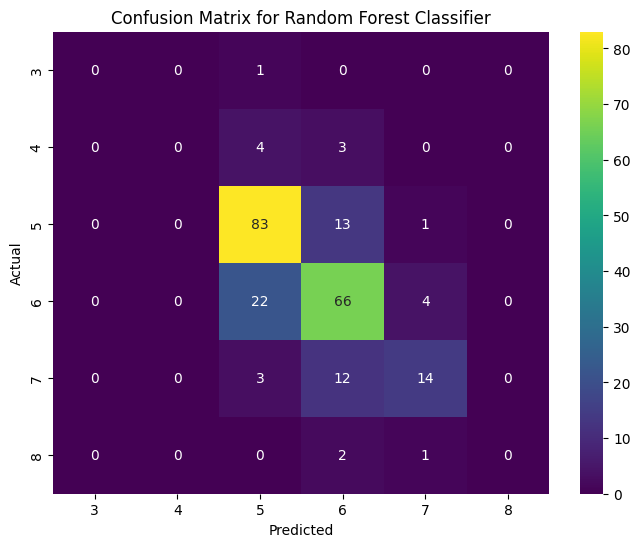

In [76]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [77]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X.columns

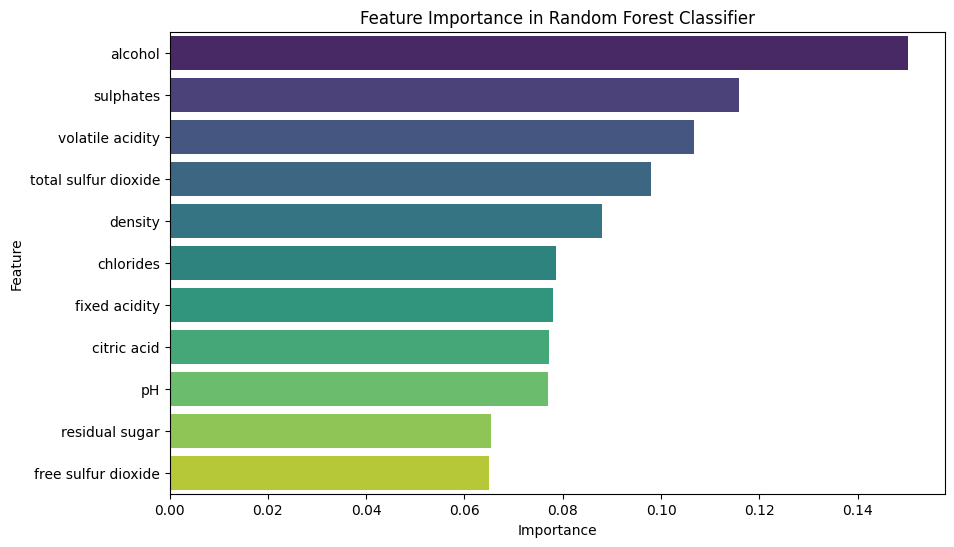

In [78]:
# Plot feature importances
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette="viridis")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()

### Stochastic Gradient Descent

In [79]:
# Initialize and train the SGD Classifier
# Initialize and train the SGD Classifier
sgd_model = SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000, tol=1e-3, random_state=42)



In [80]:
# Train the model
sgd_model.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [81]:
# Make predictions
sgd_pred = sgd_model.predict(X_test)

In [98]:
# Model evaluation
# Accuracy Score
sgd_accuracy = accuracy_score(y_test, sgd_pred)
print("Accuracy:", sgd_accuracy)


Accuracy: 0.5676855895196506


In [99]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, sgd_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.75      0.72        97
           6       0.56      0.42      0.48        92
           7       0.35      0.62      0.45        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.27      0.30      0.28       229
weighted avg       0.56      0.57      0.56       229



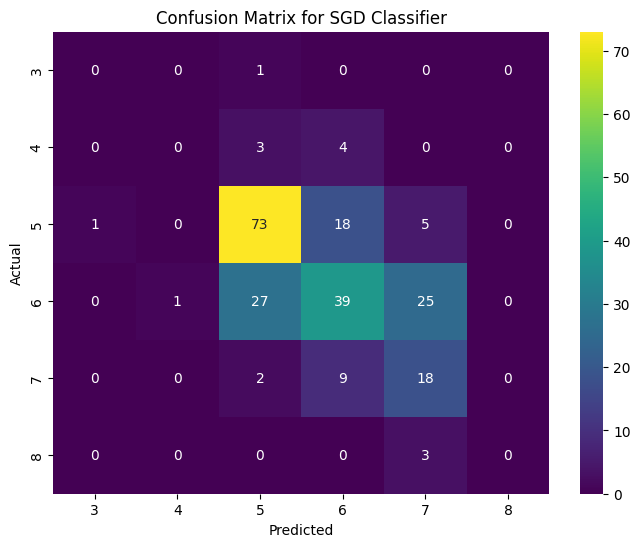

In [100]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, sgd_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SGD Classifier")
plt.show()

### Support Vector Classifier (SVC)

In [101]:
# Initialize and train the SVM model
# Using RBF kernel to handle non-linear relationships
svc_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

In [102]:
# Train the model
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [103]:
# Make predictions
svc_pred = svc_model.predict(X_test)

In [104]:
# Model evaluation
# Accuracy Score
svc_accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", svc_accuracy)

Accuracy: 0.6681222707423581


In [105]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, svc_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.80      0.76        97
           6       0.61      0.72      0.66        92
           7       0.69      0.31      0.43        29
           8       0.00      0.00      0.00         3

    accuracy                           0.67       229
   macro avg       0.34      0.31      0.31       229
weighted avg       0.64      0.67      0.64       229



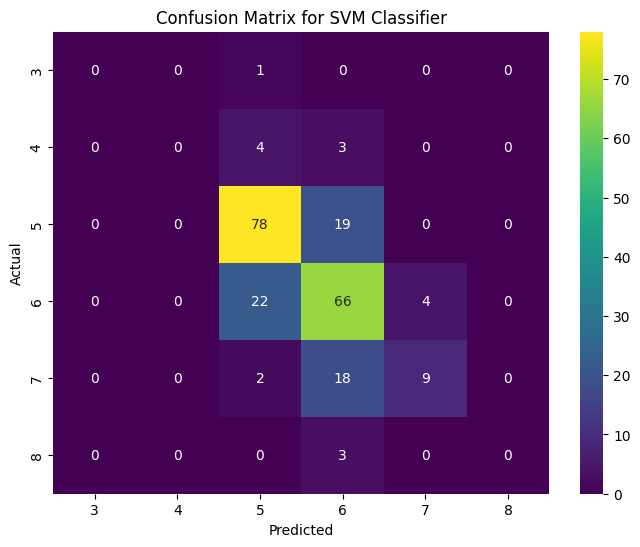

In [106]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


In [92]:
# Initialize GridSearchCV with SVC and the parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [107]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.6105266318381072


In [110]:
# Summary of model performances
model_performances = {}
model_performances['Random Forest'] = rf_accuracy
model_performances['Stochastic Gradient Descent'] = sgd_accuracy
model_performances['Support Vector Machine'] = svc_accuracy

print("\nModel Performance Summary:")
for model_name, accuracy in model_performances.items():
    print(f"{model_name}: {accuracy}")



Model Performance Summary:
Random Forest: 0.7117903930131004
Stochastic Gradient Descent: 0.5676855895196506
Support Vector Machine: 0.6681222707423581


In [111]:
# Identify the best model based on accuracy
best_model_name = max(model_performances, key=model_performances.get)
best_model_accuracy = model_performances[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {best_model_accuracy}")



Best Model: Random Forest with accuracy: 0.7117903930131004


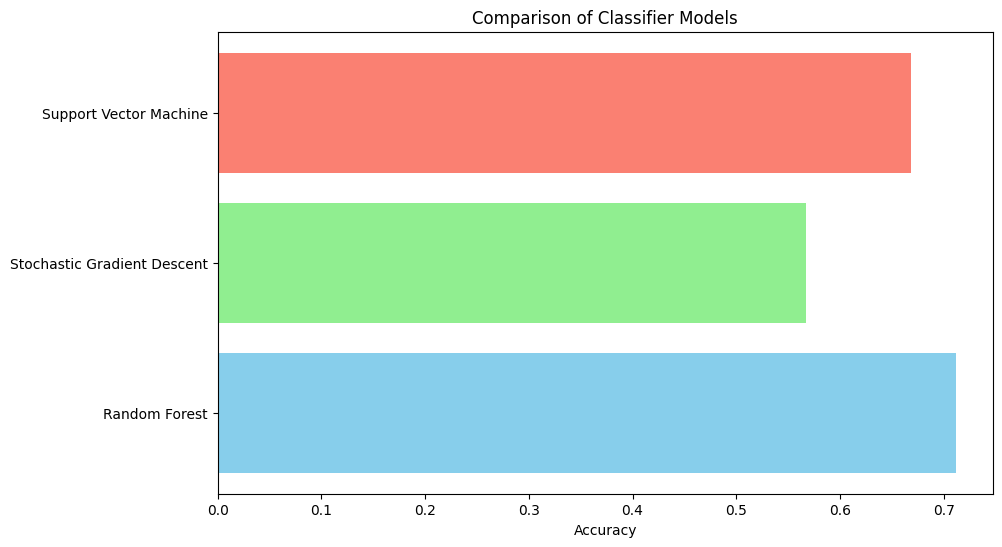

In [112]:
# Visualization: Compare Model Accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(model_performances.keys()), list(model_performances.values()), color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Accuracy')
plt.title('Comparison of Classifier Models')
plt.show()

In [114]:
# Example of a new wine sample preddiction with Best model Random Forest
new_sample = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.0],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})

# Predict the quality
predicted_quality = rf_model.predict(new_sample)
print("Predicted Quality:", predicted_quality[0])

Predicted Quality: 5
